---
**Deepfake Detection using CNN**


---



In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download manjilkarki/deepfake-and-real-images

 99% 1.67G/1.68G [00:24<00:00, 130MB/s]
100% 1.68G/1.68G [00:24<00:00, 74.8MB/s]


In [ ]:
! unzip deepfake-and-real-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to plot 6 images separately from a folder
def plot_images_separately_from_folder(folder_path, title):
    images = os.listdir(folder_path)[:6]  # List of first 6 images in the folder

    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=14)
    for i, image_name in enumerate(images):
        img = mpimg.imread(os.path.join(folder_path, image_name))
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i+1}")

    plt.show()

# Paths to different folders
paths = [
    ('Train Fake', '/content/Dataset/Train/Fake'),
    ('Train Real', '/content/Dataset/Train/Real'),
    ('Test Fake', '/content/Dataset/Test/Fake'),
    ('Test Real', '/content/Dataset/Test/Real'),
    ('Validation Fake', '/content/Dataset/Validation/Fake'),
    ('Validation Real', '/content/Dataset/Validation/Real')
]

# Plot 6 images separately from each folder
for title, path in paths:
    print(f"Displaying 6 images separately from {title}:")
    plot_images_separately_from_folder(path, title)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Setting up the paths
train_path = '/content/Dataset/Train'
test_path = '/content/Dataset/Test'
validation_path = '/content/Dataset/Validation'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Setting up the generators
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [ ]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
4375/4375 [==============================] - 400s 90ms/step - loss: 0.3136 - accuracy: 0.8580 - val_loss: 0.2779 - val_accuracy: 0.8790
Epoch 2/10
4375/4375 [==============================] - 384s 88ms/step - loss: 0.1532 - accuracy: 0.9374 - val_loss: 0.2249 - val_accuracy: 0.9034
Epoch 3/10
4375/4375 [==============================] - 396s 91ms/step - loss: 0.1015 - accuracy: 0.9589 - val_loss: 0.2480 - val_accuracy: 0.8952
Epoch 4/10
4375/4375 [==============================] - 400s 91ms/step - loss: 0.0678 - accuracy: 0.9730 - val_loss: 0.2592 - val_accuracy: 0.9158
Epoch 5/10
4375/4375 [==============================] - 391s 89ms/step - loss: 0.0478 - accuracy: 0.9817 - val_loss: 0.3022 - val_accuracy: 0.9221
Epoch 6/10
4375/4375 [==============================] - 384s 88ms/step - loss: 0.0366 - accuracy: 0.9860 - val_loss: 0.3737 - val_accuracy: 0.9086
Epoch 7/10
4375/4375 [==============================] - 378s 86ms/step - loss: 0.0294 - accuracy: 0.9893 - val_loss: 0

In [ ]:
# Build the CNN model
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='mish', input_shape=(256, 256, 3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='mish'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128, (3, 3), activation='mish'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(256, (3, 3), activation='mish'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(128, activation='mish'))
model_2.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
# Train the model
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
4375/4375 [==============================] - 601s 135ms/step - loss: 0.2416 - accuracy: 0.8944 - val_loss: 0.2037 - val_accuracy: 0.9159
Epoch 2/5
4375/4375 [==============================] - 588s 134ms/step - loss: 0.1053 - accuracy: 0.9582 - val_loss: 0.1768 - val_accuracy: 0.9247
Epoch 3/5
4375/4375 [==============================] - 585s 134ms/step - loss: 0.0690 - accuracy: 0.9728 - val_loss: 0.1547 - val_accuracy: 0.9431
Epoch 4/5
4375/4375 [==============================] - 585s 134ms/step - loss: 0.0536 - accuracy: 0.9784 - val_loss: 0.1880 - val_accuracy: 0.9439
Epoch 5/5
4375/4375 [==============================] - 589s 135ms/step - loss: 0.0475 - accuracy: 0.9816 - val_loss: 0.1641 - val_accuracy: 0.9493


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

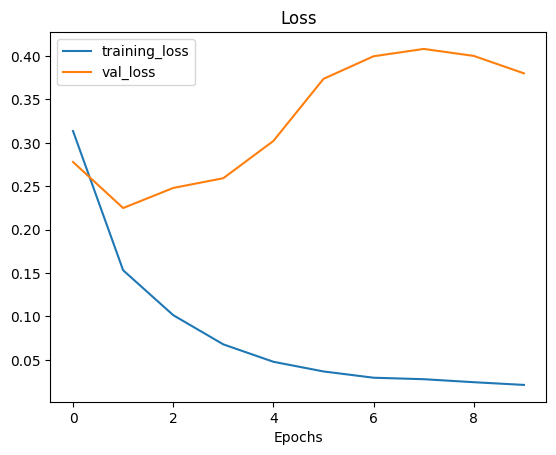

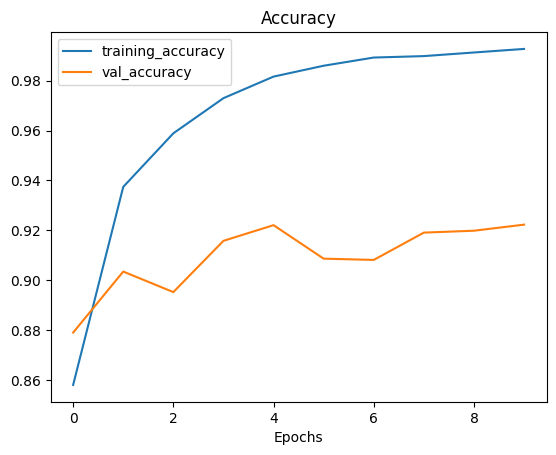

In [ ]:
plot_loss_curves(history)

In [ ]:
model_2.evaluate(validation_generator)

1233/1233 [==============================] - 94s 76ms/step - loss: 0.1641 - accuracy: 0.9493


[0.16412587463855743, 0.9492745995521545]

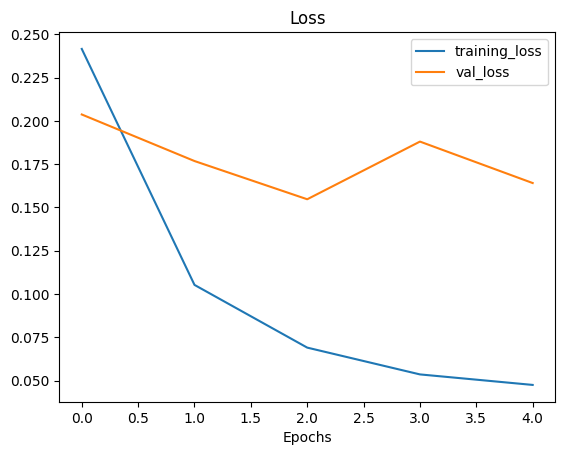

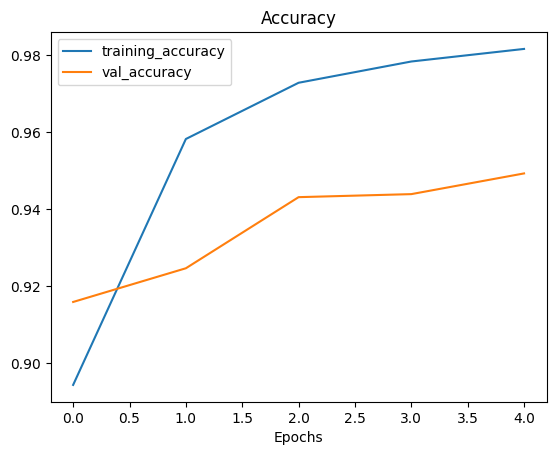

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model.save('CNN_Deepfake.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####Predition of Images

In [ ]:
import urllib
from PIL import Image
def load_and_prep_image_from_url(image_url):
    """
    Loads and preprocesses an image from a URL.
    """
    # Load the image from the URL
    response = urllib.request.urlopen(image_url)
    img = Image.open(response)

    # Resize and preprocess the image
    img = img.resize
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0

    return img_array

def pred_and_plot_from_url(model, image_url):
    """
    Imports an image from a URL, makes a prediction on it with
    a trained model, and plots the image with the predicted class as the title.
    """
    # Load and preprocess the image from the URL
    img = load_and_prep_image_from_url(image_url)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if pred > 0.49438050:
        pred_class = "Real"
    else:
        pred_class = "Fake"

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    print(pred)
    plt.axis(False)
    plt.show()

In [ ]:
# Function to load and preprocess an image from Google Drive
def load_and_prep_image_from_drive(image_path):
    """
    Loads and preprocesses an image from Google Drive.
    """
    # Load the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

    # Convert image to array and normalize
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0

    return img_array

def pred_and_plot_from_drive(model, image_path):
    """
    Imports an image from Google Drive, makes a prediction on it with
    a trained model, and plots the image with the predicted class as the title.
    """
    # Load and preprocess the image from Google Drive
    img = load_and_prep_image_from_drive(image_path)
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if pred > 0.5:
        pred_class = "Real"
    else:
        pred_class = "Fake"

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()


1/1 [==============================] - 0s 18ms/step
[[0.4876179]]


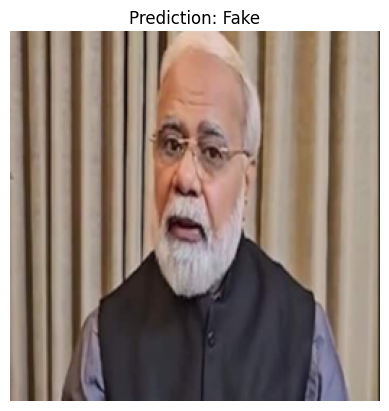

In [ ]:
image_url = 'https://akm-img-a-in.tosshub.com/indiatoday/images/story/202311/pm-narendra-modi-deepfake-doppelganger-clarification-230604944-16x9_0.png?VersionId=VfQBLkUJcxXa3c_CqTMIwMa_oUVi.Tya&size=690:388'
pred_and_plot_from_url(model, image_url)

1/1 [==============================] - 0s 17ms/step
[[0.49438056]]


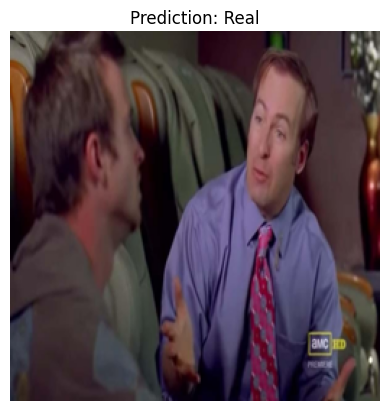

In [ ]:
image_url = 'https://www.cnet.com/a/img/resize/813e6c3e7d3f5d5ccb8ab3443d4713b7d4a9f660/hub/2020/01/07/d5f6c1e1-ac9f-440b-96e6-37f9f4172b2e/better-call-saul-1.jpg?auto=webp&width=1200'
pred_and_plot_from_url(model, image_url)

1/1 [==============================] - 0s 18ms/step
[[0.49400488]]


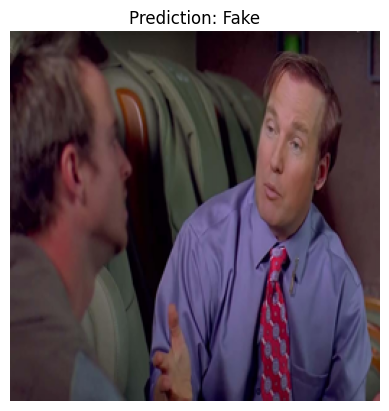

In [ ]:
image_url = 'https://www.cnet.com/a/img/resize/4945e6b13fa64dce5c0c47c9b5ec104ec282a94c/hub/2020/01/07/e84fa61b-1e22-4d14-b652-38874a965292/better-call-saul-2.jpg?auto=webp&width=1200'
pred_and_plot_from_url(model, image_url)